IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import pickle
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix,classification_report,auc,roc_curve
import xgboost as xgb
import pickle

In [42]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

#### Attribute Information

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.target.unique()

array([1, 0], dtype=int64)

In [7]:
df.thal.unique()

array([1, 2, 3, 0], dtype=int64)

In [8]:
df.ca.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [9]:
df.slope.unique()

array([0, 2, 1], dtype=int64)

In [10]:
df.exang.unique()

array([0, 1], dtype=int64)

In [11]:
df.restecg.unique()

array([0, 1, 2], dtype=int64)

In [12]:
df.fbs.unique()

array([1, 0], dtype=int64)

In [13]:
df.cp.unique()

array([3, 2, 1, 0], dtype=int64)

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


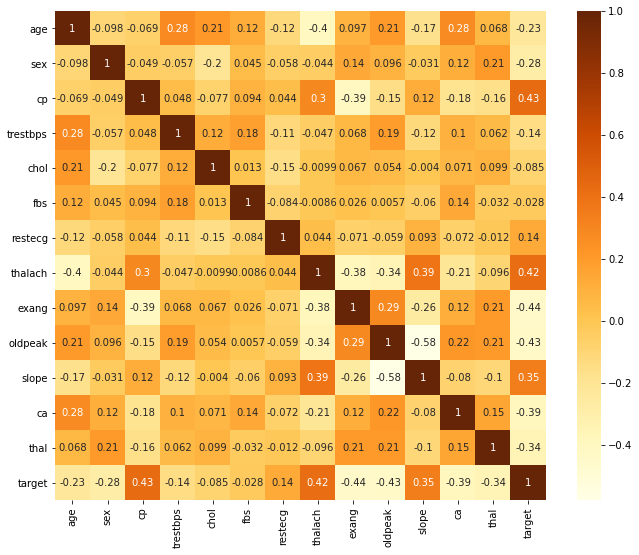

In [15]:
plt.figure(figsize=(11,9))
sns.heatmap(df.corr(),annot=True,cmap="YlOrBr")
plt.show()

### Distribution of Age

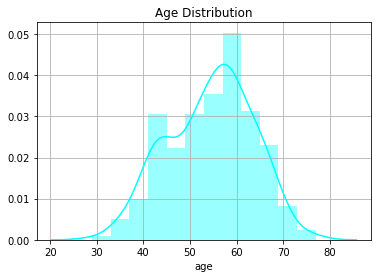

In [16]:
sns.distplot(df['age'],color='cyan')
plt.grid(b=True)
plt.title("Age Distribution")
plt.show()

The above plot shows us that the most number of people suffering from heart disease are from age between 55-60 years. People with age group 20-30 have a very less chance of heart disease

### Distribution of Gender

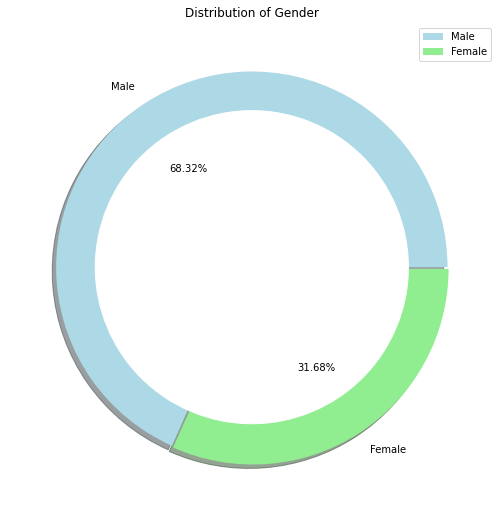

In [17]:
size = df['sex'].value_counts()
labels = ["Male","Female"]
colors = ["lightblue","lightgreen"]
explode = [0,0.01]

my_circle = plt.Circle((0,0),0.8,color="white")
plt.rcParams['figure.figsize'] = (9,9)
plt.pie(size,explode=explode,labels=labels,colors = colors,autopct="%.2f%%",shadow=True)
plt.title("Distribution of Gender")
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

From above plot we can see that Men who are more tha double as compared to women are more likely to have heart diseases
Also More unmber of men have been tested for heart disease

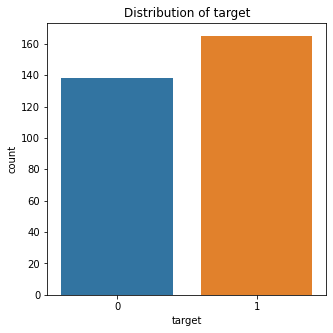

In [18]:
plt.figure(figsize=(5,5))
sns.countplot(df['target'])
plt.title("Distribution of target")
plt.show()

The dataset is quite balanced. Where target= 1 says that the patient has a heart disease and target = 0 says that patient do not have a heart disease

### Relation of Cholestrol with heart disease

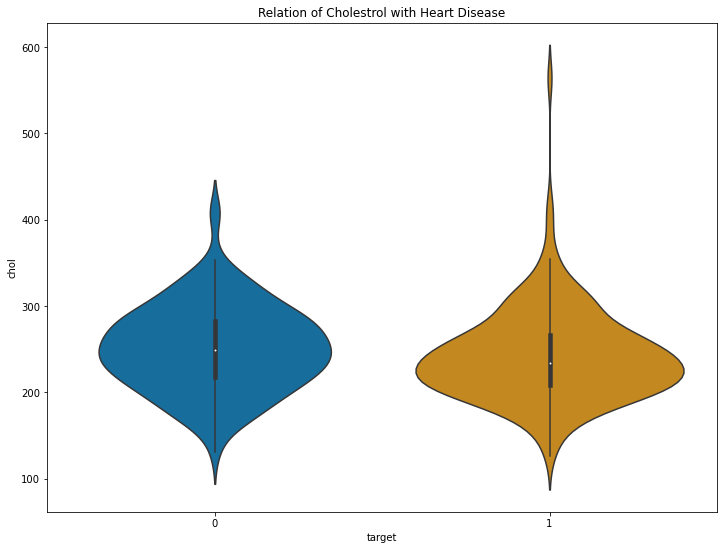

In [19]:
plt.rcParams['figure.figsize'] = (12,9)
sns.violinplot(x=df['target'],y=df['chol'],palette="colorblind")
plt.title("Relation of Cholestrol with Heart Disease")
plt.show()

Hence from above plot we can see that the patient with more cholestrol level is likely to suffer a heart disease

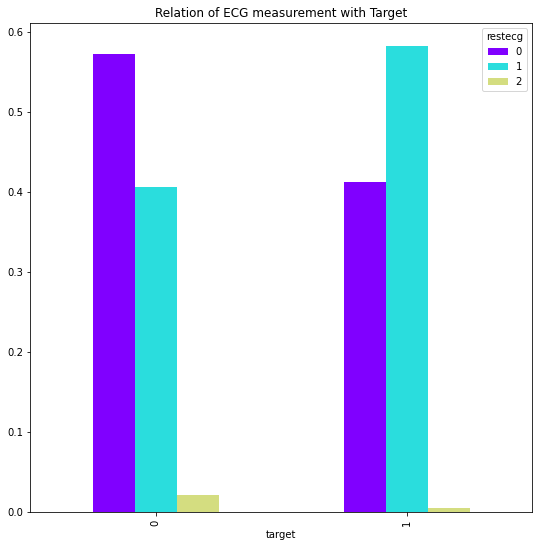

In [20]:
# Resting electrocardiographic measurement vs target
plt.rcParams['figure.figsize']=(9,9)
dat = pd.crosstab(df['target'],df['restecg'])
dat.div(dat.sum(1).astype(float),axis=0).plot(kind="bar",stacked=False,color=plt.cm.rainbow(np.linspace(0,1,4)))
plt.title("Relation of ECG measurement with Target")
plt.show()

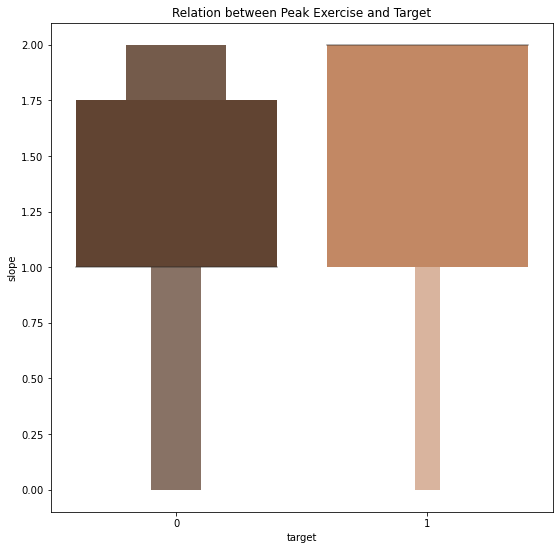

In [21]:
plt.rcParams['figure.figsize'] = (9,9)
sns.boxenplot(df['target'],df['slope'],palette='copper')
plt.title("Relation between Peak Exercise and Target")
plt.show()

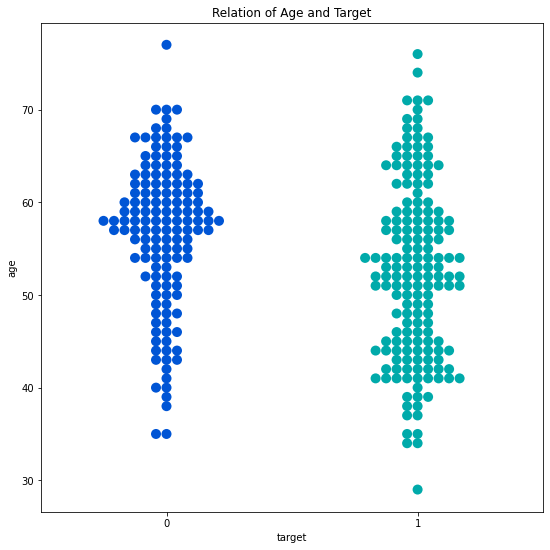

In [22]:
plt.rcParams['figure.figsize'] = (9,9)
sns.swarmplot(df['target'],df['age'],palette="winter",size=10)
plt.title("Relation of Age and Target")
plt.show()

### Changing the name of column for better understanding


In [43]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [44]:
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'
df['chest_pain_type'][df['chest_pain_type'] == 0] = "typical angina"
df['chest_pain_type'][df['chest_pain_type'] == 1] = "atypical angina"
df['chest_pain_type'][df['chest_pain_type'] == 2] = "non-anginal pain"
df['chest_pain_type'][df['chest_pain_type'] == 3] = "asymptomatic"

df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = "lower than 120mg/ml"
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = "greater than 120mg/ml"

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

df['st_slope'][df['st_slope'] == 0] = 'upsloping'
df['st_slope'][df['st_slope'] == 1] = 'flat'
df['st_slope'][df['st_slope'] == 2] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 1] = 'normal'
df['thalassemia'][df['thalassemia'] == 2] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'

In [45]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,normal,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,fixed defect,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,1


In [64]:
df[df.target == 0]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
165,67,male,typical angina,160,286,lower than 120mg/ml,normal,108,yes,1.5,flat,3,fixed defect,0
166,67,male,typical angina,120,229,lower than 120mg/ml,normal,129,yes,2.6,flat,2,reversable defect,0
167,62,female,typical angina,140,268,lower than 120mg/ml,normal,160,no,3.6,upsloping,2,fixed defect,0
168,63,male,typical angina,130,254,lower than 120mg/ml,normal,147,no,1.4,flat,1,reversable defect,0
169,53,male,typical angina,140,203,greater than 120mg/ml,normal,155,yes,3.1,upsloping,0,reversable defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,typical angina,140,241,lower than 120mg/ml,ST-T wave abnormality,123,yes,0.2,flat,0,reversable defect,0
299,45,male,asymptomatic,110,264,lower than 120mg/ml,ST-T wave abnormality,132,no,1.2,flat,0,reversable defect,0
300,68,male,typical angina,144,193,greater than 120mg/ml,ST-T wave abnormality,141,no,3.4,flat,2,reversable defect,0
301,57,male,typical angina,130,131,lower than 120mg/ml,ST-T wave abnormality,115,yes,1.2,flat,1,reversable defect,0


In [46]:
df['sex'] = df['sex'].astype('object')
df['chest_pain_type'] = df['chest_pain_type'].astype('object')
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].astype('object')
df['rest_ecg'] = df['rest_ecg'].astype('object')
df['exercise_induced_angina'] = df['exercise_induced_angina'].astype('object')
df['st_slope'] = df['st_slope'].astype('object')
df['thalassemia'] = df['thalassemia'].astype('object')

In [47]:
#taking the labels out fromm data
y = df['target']
data = df.drop(['target'],axis=1)
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,normal
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,fixed defect
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect


In [28]:
data.shape

(303, 13)

In [29]:
y.shape

(303,)

In [48]:
data = pd.get_dummies(data,drop_first=True)

In [49]:
data.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,0,0,0,0,0,1,0,0,1,0,1,0
1,37,130,250,187,3.5,0,1,0,1,0,1,0,0,0,0,1,1,0,0
2,41,130,204,172,1.4,0,0,1,0,0,1,0,1,0,0,0,1,0,0
3,56,120,236,178,0.8,0,1,1,0,0,1,0,0,0,0,0,1,0,0
4,57,120,354,163,0.6,0,0,0,0,1,1,0,0,1,0,0,1,0,0


In [50]:
x = data

In [14]:
print("x shape: ",x.shape )
print("y shape: ",y.shape)

x shape:  (303, 19)
y shape:  (303,)


In [15]:
y.value_counts()

1    165
0    138
Name: target, dtype: int64

In [51]:
#splitting the data
x_train,x_test,y_train,y_test = train_test_split(x.values,y.values,test_size=0.20,random_state=0)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (242, 19)
Shape of x_test : (61, 19)
Shape of y_train : (242,)
Shape of y_test : (61,)


### Modelling

### **Random Forest Classifier**

In [71]:
rf_clf = RandomForestClassifier()

In [72]:
n_estimator_rf = [100,200,500,700,900,1200]
max_depth_rf = [4,5,7,9,12]
min_samples_split = [2,3,5,7,9,12,15]
max_features = ['auto','sqrt','log2']
min_impurity_split = [0.0001,0.001,0.01,0.1,0.15,0.2]

In [73]:
hyperparameter_rf = {
    'n_estimators':n_estimator_rf,
    'max_depth':max_depth_rf,
    'min_samples_split':min_samples_split,
    'max_features':max_features,
    'min_impurity_split':min_impurity_split
}

In [74]:
rf_clf_r = RandomizedSearchCV(estimator=rf_clf,param_distributions=hyperparameter_rf,cv=10,n_iter=10,n_jobs=-1,scoring='accuracy',random_state=0)

In [75]:
rf_clf_r.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [4, 5, 7, 9, 12],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_impurity_split': [0.0001, 0.001,
                                                               0.01, 0.1, 0.15,
                                                               0.2],
                                        'min_samples_split': [2, 3, 5, 7, 9, 12,
                                                              15],
                                        'n_estimators': [100, 200, 500, 700,
                                                         900, 1200]},
                   random_state=0, scoring='accuracy')

In [76]:
rf_clf_r.best_score_

0.8351666666666666

In [77]:
rf_clf_r.best_params_

{'n_estimators': 700,
 'min_samples_split': 2,
 'min_impurity_split': 0.01,
 'max_features': 'sqrt',
 'max_depth': 9}

In [81]:
rf_clf_r.best_estimator_

RandomForestClassifier(max_depth=9, max_features='sqrt',
                       min_impurity_split=0.01, n_estimators=700)

In [79]:
model_rf = RandomForestClassifier(n_estimators = 700,max_depth=9,max_features='sqrt',min_samples_split=2,min_impurity_split=0.01,random_state=0)

In [36]:
model_rf = RandomForestClassifier(n_estimators = 50, max_depth = 5)

In [37]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=50)

In [38]:
y_pred1 = model_rf.predict(x_test)

In [39]:
print("Accuracy: ",accuracy_score(y_test,y_pred1))

Accuracy:  0.8688524590163934


In [40]:
print("Testing Accuracy: ",model_rf.score(x_test,y_test))

Testing Accuracy:  0.8688524590163934


              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



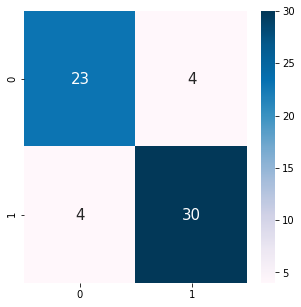

In [41]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred1)
plt.rcParams['figure.figsize'] =(5,5)
sns.heatmap(cm,annot=True,annot_kws={'size':15},cmap="PuBu")
cr = classification_report(y_test,y_pred1)
print(cr)

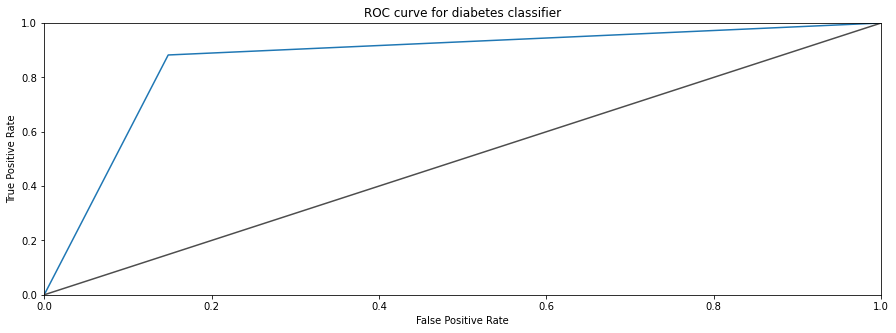

In [52]:
#roc curve
fpr , tpr,thresholds = roc_curve(y_test,y_pred1)

fig, ax = plt.subplots()

ax.plot(fpr,tpr)
ax.plot([0,1],[0,1],transform = ax.transAxes, ls="-",c=".3")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.rcParams['figure.figsize'] = (15,5)
plt.title("ROC curve for diabetes classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

**XGBOOST**

In [56]:
xgb_clf = xgb.XGBClassifier()

In [57]:
max_depth_xgb = [3,5,7,9,12]
learning_rate = [0.001,0.01,0.1,0.2,0.5]
booster = ['gblinear','gbtree','dart']
gamma = [0.25,0.5,1.0,2.0,5.0]
subsample = [0.2,0.3,0.5,0.6,0.7]
colsample_bytree = [0.2,0.3,0.5,0.7,0.9]
colsample_bylevel = [0.3,0.5,0.7,0.9]

In [58]:
hyperparameter_xgb = {
    'max_depth':max_depth_xgb,
    'learning_rate':learning_rate,
    'booster':booster,
    'gamma':gamma,
    'subsample':subsample,
    'colsample_bytree':colsample_bytree,
    'colsample_bylevel':colsample_bylevel
}

In [59]:
xgb_clf_r = RandomizedSearchCV(estimator=xgb_clf,param_distributions=hyperparameter_xgb,cv=10,n_iter=20,scoring='accuracy',n_jobs = -1,random_state=0)

In [60]:
xgb_clf_r.fit(x_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100...
                                           validate_parameters=False,
                                           verbosity=None),
                   n_iter=20, n_jobs=-1,
          

In [61]:
xgb_clf_r.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.9, gamma=1.0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.2,
              tree_method=None, validate_parameters=False, verbosity=None)

In [52]:
model_xgb = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.9, gamma=1.0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.2,
              tree_method=None, validate_parameters=False, verbosity=None)

In [53]:
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.9, gamma=1.0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.2,
              tree_method=None, validate_parameters=False, verbosity=None)

In [54]:
y_pred2 = model_xgb.predict(x_test)

In [55]:
print("Accuracy: ",accuracy_score(y_test,y_pred2))

Accuracy:  0.8852459016393442


In [56]:
with open("heart_model.pkl","wb") as f:
    pickle.dump(model_xgb,f)

In [21]:
x_train.loc[0].shape

(19,)

In [57]:
model = pickle.load(open("heart_model.pkl","rb"))
cols_build = model.get_booster().feature_names

In [58]:
cols_build

['f0',
 'f1',
 'f2',
 'f3',
 'f4',
 'f5',
 'f6',
 'f7',
 'f8',
 'f9',
 'f10',
 'f11',
 'f12',
 'f13',
 'f14',
 'f15',
 'f16',
 'f17',
 'f18']

In [59]:
x = np.array([ 65 , 145,  233,  150,    2.3 ,  0,    1,   0,    0,    1,    0,    0,
    0,   1,  1,   0,    0,   1,    0,])

In [60]:
x = np.reshape(x,(1,19))
model.predict(x)

array([0], dtype=int64)